### Presented by: Princilla Abena Koranteng

This is a supervised machine learning project where Regression is used to predict continuous values.


Regression in machine learning is a type of supervised learning that is used to predict a continuous outcome variable (also called the dependent variable or label) based on one or more input features (also called independent variables or predictors). The goal of regression is to find a relationship between the input features and the output variable, and then use that relationship to make predictions on new, unseen data.

In [184]:
# Library for handling data and processing numbers
import pandas as pd
import numpy as np

# Libraries for plotting
import seaborn as sns 
import matplotlib.pyplot as plt
import missingno as msn

# Reducing warning content
import warnings
warnings.filterwarnings("ignore")

## Data Importation

In [185]:
# Description of the content of the data
df_description = pd.read_csv('Data Description.csv')
df_description

,Understanding the Data,Unnamed: 1
0,Model,4WD/4X4 = Four-wheel drive
1,NaN,AWD = All-wheel drive
2,NaN,FFV = Flexible-fuel vehicle
3,NaN,SWB = Short wheelbase
4,NaN,LWB = Long wheelbase
5,NaN,EWB = Extended wheelbase
6,Transmission,A = automatic
7,NaN,AM = automated manual
8,NaN,AS = automatic with select shift
9,NaN,AV = continuously variable


In [186]:
# Importing the data
df=pd.read_csv('CO2 Emissions_Canada.csv')

## Exploratory Data Analysis

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

Data has only float,object and integer values.

In [188]:
df.shape

(7385, 12)

Original Data contains 7385 observations and 12 columns

In [189]:
df.isnull().values.any()

False

There are no missing values

In [190]:
#Dropping Duplicates
df.drop_duplicates(keep='first',inplace=True)
df.shape

(6282, 12)

After removing the duplicates, we are left with 6282 observations and 12 columns

In [191]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,6282.000000,6282.000000,6282.000000,6282.000000,6282.000000,6282.000000,6282.000000
mean,3.161812,5.618911,12.610220,9.070583,11.017876,27.411016,251.157752
std,1.365201,1.846250,3.553066,2.278884,2.946876,7.245318,59.290426
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.700000,10.300000,12.700000,32.000000,289.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


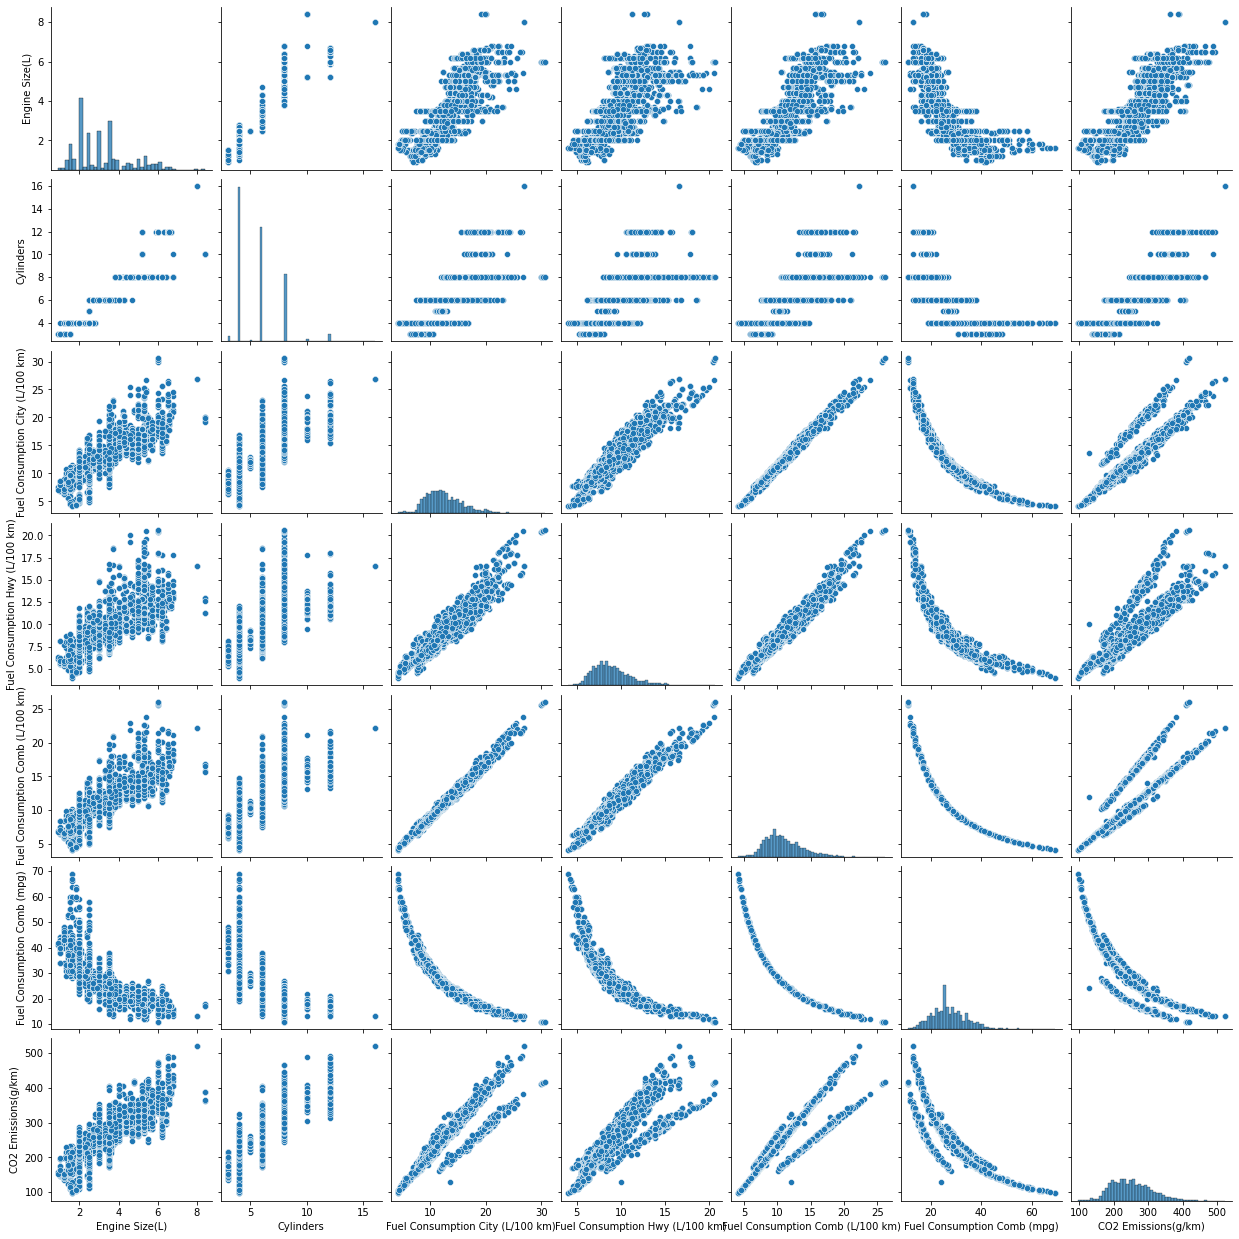

In [192]:
sns.pairplot(df)

Based on the pairplot above, it is noted that,

1. As engine size increases:

* fuel consumption (L/100km) increases
* the number of cylinders increases

2. CO2 Emissions generally increase with increase in all the features with the exception of 'Fuel Consumption Com (mpg)' where there is an inverse non-linear relationship

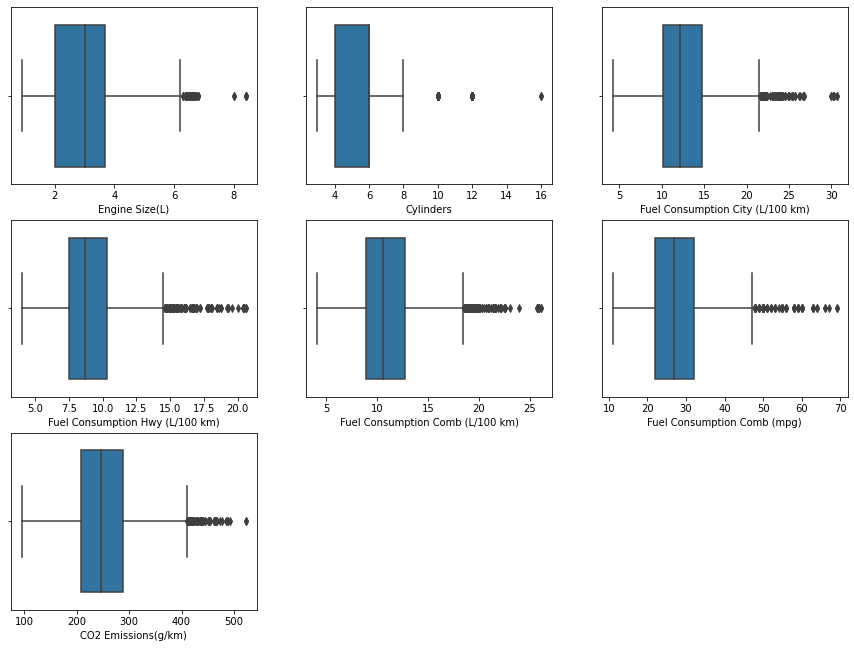

In [193]:
numeric_columns=['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)']
j=1 
fig = plt.figure(figsize = (15,15))
for i in numeric_columns:
    plt.subplot(4,3,j)
    sns.boxplot(df[i])
    j=j+1

The distribution of values in the various columns indicate the need for scaling features since there non-uniformly distributed values in a number of the columns

Text(0.5, 1.0, 'Correlation Heatmap')

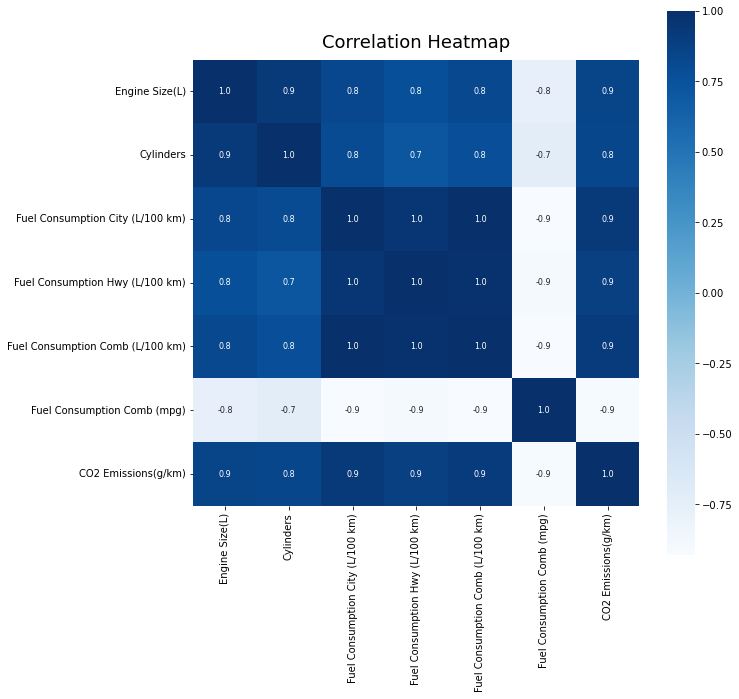

In [194]:
# constructing a heatmap to understand the correlation between the columns
plt.figure(figsize=(10,10))
heatmap=sns.heatmap(df.corr(), cbar=True, square=True, fmt = '.1f', annot = True, annot_kws={'size':8}, cmap = 'Blues')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

In [195]:
## Dropping 'Fuel Consumption Hwy (L/100 km)' and 'Fuel Consumption City (L/100 km)' 
## because they have perfect correlation with 'Fuel Consumption Comb (L/100 km)'
df.drop(columns=['Fuel Consumption City (L/100 km)','Fuel Consumption Hwy (L/100 km)'], inplace=True)

In [196]:
for i in df.columns:
    print(i,': ',df[i].nunique())
    print("\n")

Make :  42


Model :  2053


Vehicle Class :  16


Engine Size(L) :  51


Cylinders :  8


Transmission :  27


Fuel Type :  5


Fuel Consumption Comb (L/100 km) :  181


Fuel Consumption Comb (mpg) :  54


CO2 Emissions(g/km) :  331




In [197]:
df

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,9.9,29,232


In [198]:
# Encoding only fuel type,vehicle class and Transmission out of all the non-numeric features
# using pd.get_dummies since the rest contain too many unique values and will increase the feature so much
df.drop(columns=['Make','Model','Transmission'], inplace=True)
fuelType_encoded=pd.get_dummies(df['Fuel Type'],prefix='Fuel',drop_first=True)
vehicleClass_encoded=pd.get_dummies(df['Vehicle Class'],prefix='Vehicle',drop_first=True)
df.drop(columns=['Fuel Type','Vehicle Class'],axis=1,inplace=True)
df_encoded= pd.concat([df,fuelType_encoded,vehicleClass_encoded],axis=1)

In [199]:
df_encoded.drop_duplicates(keep='first',inplace=True)

In [200]:
df_encoded.shape

(4061, 24)

### Presented by: Princilla Abena Koranteng

## Building Models

In [201]:
X=df_encoded.drop(['CO2 Emissions(g/km)'],axis=1)
y=df_encoded['CO2 Emissions(g/km)']

In [255]:
from sklearn.pipeline import Pipeline

#Data Preprocessing Imports
from sklearn.preprocessing import StandardScaler

#Ensemble Models
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import VotingRegressor


#Tree models
from sklearn.tree import DecisionTreeRegressor

# Metric Imports
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Model Selection imports
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

#Linear Model imports
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge
from  sklearn.linear_model import Lasso 

#Neighbors models
from sklearn.neighbors import KNeighborsRegressor



In [203]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
sc=StandardScaler()

## 1. RandomForestRegressor

In [204]:
# Creating a RandomForestRegressor with scaling
rf=RandomForestRegressor(n_estimators=100)
steps=[('sc',sc),('rf',rf)]
rfscale=Pipeline(steps)
rfscale.fit(X_train,y_train)

Pipeline(steps=[('sc', StandardScaler()), ('rf', RandomForestRegressor())])

In [205]:
cv_scaled=cross_val_score(rfscale,X_train,y_train,scoring='neg_mean_squared_error',cv=4)
cv_scaled.mean()

-28.96836848620688

### Tuninig RandomForest Parameters

In [206]:
rfnew=RandomForestRegressor(random_state=2)
rfpipe=Pipeline(steps=[('sc',sc),('rfnew',rfnew)])
params=dict(rfnew__max_depth=list(range(2,8)),rfnew__n_estimators=list(range(50,150)))

In [207]:
rcv=RandomizedSearchCV(rfpipe,params,scoring='neg_mean_squared_error',cv=4)

In [208]:
rcv.fit(X_train,y_train)
rcv.best_estimator_.get_params()

{'memory': None,
 'steps': [('sc', StandardScaler()),
  ('rfnew',
   RandomForestRegressor(max_depth=7, n_estimators=144, random_state=2))],
 'verbose': False,
 'sc': StandardScaler(),
 'rfnew': RandomForestRegressor(max_depth=7, n_estimators=144, random_state=2),
 'sc__copy': True,
 'sc__with_mean': True,
 'sc__with_std': True,
 'rfnew__bootstrap': True,
 'rfnew__ccp_alpha': 0.0,
 'rfnew__criterion': 'squared_error',
 'rfnew__max_depth': 7,
 'rfnew__max_features': 'auto',
 'rfnew__max_leaf_nodes': None,
 'rfnew__max_samples': None,
 'rfnew__min_impurity_decrease': 0.0,
 'rfnew__min_samples_leaf': 1,
 'rfnew__min_samples_split': 2,
 'rfnew__min_weight_fraction_leaf': 0.0,
 'rfnew__n_estimators': 144,
 'rfnew__n_jobs': None,
 'rfnew__oob_score': False,
 'rfnew__random_state': 2,
 'rfnew__verbose': 0,
 'rfnew__warm_start': False}

Based on the randomized search, the choice max_depth is 7 and the n_estimators is 144

In [209]:
rf_final1=RandomForestRegressor(max_depth=7,n_estimators=144,random_state=2)
rf_final1.fit(X_train,y_train)

RandomForestRegressor(max_depth=7, n_estimators=144, random_state=2)

In [210]:
pred1=rf_final1.predict(X_test)
rf_mse=mean_squared_error(y_test,pred1)
rf_mse

21.510252422511815

In [211]:
rf_rsquared=r2_score(y_test,pred1)
rf_rsquared

0.9941637922249574

Mean squared of **21.510** and r2_score of **0.9942** for RandomForestRegressor

## 2. SGDRegressor

In [212]:
#creating SGDRegressor with scaling
sgd=SGDRegressor(random_state=3)
sgdscale=Pipeline(steps=[('sc',sc),('sgd',sgd)])
sgdscale.fit(X_train,y_train)

Pipeline(steps=[('sc', StandardScaler()),
                ('sgd', SGDRegressor(random_state=3))])

In [213]:
cv_scaled=cross_val_score(sgdscale,X_train,y_train,scoring='neg_mean_squared_error',cv=4)
cv_scaled.mean()

-57.076390249903504

### Tuning Parameters

In [214]:
sgdnew=SGDRegressor(random_state=3,max_iter=3000)
params=dict(sgdnew__loss=['squared_error',
                          'huber','epsilon_insensitive'],sgdnew__alpha=np.geomspace(0.001,10))

In [215]:
sgdpipe=Pipeline(steps=[('sc',sc),('sgdnew',sgdnew)])
sgdrcv=RandomizedSearchCV(sgdpipe,params,n_jobs=-1)

In [234]:
sgdrcv.fit(X_train,y_train)
sgdrcv.best_estimator_.get_params()

{'memory': None,
 'steps': [('sc', StandardScaler()),
  ('sgdnew',
   SGDRegressor(alpha=0.0014563484775012444, loss='epsilon_insensitive',
                max_iter=3000, random_state=3))],
 'verbose': False,
 'sc': StandardScaler(),
 'sgdnew': SGDRegressor(alpha=0.0014563484775012444, loss='epsilon_insensitive',
              max_iter=3000, random_state=3),
 'sc__copy': True,
 'sc__with_mean': True,
 'sc__with_std': True,
 'sgdnew__alpha': 0.0014563484775012444,
 'sgdnew__average': False,
 'sgdnew__early_stopping': False,
 'sgdnew__epsilon': 0.1,
 'sgdnew__eta0': 0.01,
 'sgdnew__fit_intercept': True,
 'sgdnew__l1_ratio': 0.15,
 'sgdnew__learning_rate': 'invscaling',
 'sgdnew__loss': 'epsilon_insensitive',
 'sgdnew__max_iter': 3000,
 'sgdnew__n_iter_no_change': 5,
 'sgdnew__penalty': 'l2',
 'sgdnew__power_t': 0.25,
 'sgdnew__random_state': 3,
 'sgdnew__shuffle': True,
 'sgdnew__tol': 0.001,
 'sgdnew__validation_fraction': 0.1,
 'sgdnew__verbose': 0,
 'sgdnew__warm_start': False}

Based on the randomized search, the choice loss is 'epsilon_insensitive' and the alpha is 0.00146

In [235]:
sgd_final1=SGDRegressor(loss='epsilon_insensitive',alpha=0.00146,random_state=2,max_iter=3000)
sgdpipe=Pipeline(steps=[('sc',sc),('sgd_final1',sgd_final1)])
sgdpipe.fit(X_train,y_train)

Pipeline(steps=[('sc', StandardScaler()),
                ('sgd_final1',
                 SGDRegressor(alpha=0.00146, loss='epsilon_insensitive',
                              max_iter=3000, random_state=2))])

In [236]:
pred1=sgdpipe.predict(X_test)
sgd_mse=mean_squared_error(y_test,pred1)
sgd_mse


39.496204191301814

In [237]:
sgd_rsquared=r2_score(y_test,pred1)
sgd_rsquared

0.9892838052544327

SGDRegressor yielded mean_squared_error of **39.496** and r_2 score of **0.989**

## 3. KNeighborsRegressor

In [217]:
kn=KNeighborsRegressor(n_jobs=-1)
kn.fit(X_train,y_train)

KNeighborsRegressor(n_jobs=-1)

In [218]:
pred=kn.predict(X_test)
print('r2: ',r2_score(y_test,pred))
print('mse: ',mean_squared_error(y_test,pred))

r2:  0.9904864796936517
mse:  35.06356029532403


### Tuning parameters

In [243]:
knn=KNeighborsRegressor(n_jobs=-1)
steps=[('sc',sc),('knn',knn)]
knnpipe=Pipeline(steps=steps)
params=dict(knn__n_neighbors=list(range(3,20)))

In [244]:
knncv=GridSearchCV(knnpipe,params,n_jobs=-1)
knncv.fit(X_train,y_train)
knncv.best_estimator_.get_params()

{'memory': None,
 'steps': [('sc', StandardScaler()),
  ('knn', KNeighborsRegressor(n_jobs=-1, n_neighbors=3))],
 'verbose': False,
 'sc': StandardScaler(),
 'knn': KNeighborsRegressor(n_jobs=-1, n_neighbors=3),
 'sc__copy': True,
 'sc__with_mean': True,
 'sc__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': -1,
 'knn__n_neighbors': 3,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [245]:
knn_final1=KNeighborsRegressor(n_neighbors=3)
knnpipe=Pipeline(steps=[('sc',sc),('knn_final1',knn_final1)])
knnpipe.fit(X_train,y_train)

Pipeline(steps=[('sc', StandardScaler()),
                ('knn_final1', KNeighborsRegressor(n_neighbors=3))])

In [246]:
pred=knnpipe.predict(X_test)
knn_mse=mean_squared_error(y_test,pred)
knn_rsquared=r2_score(y_test,pred)
print('r2: ',knn_rsquared)
print('mse: ',knn_mse)

r2:  0.9857897531814133
mse:  52.374077112387205


## 4. DecisionTreeRegressor

In [221]:
dt=DecisionTreeRegressor(random_state=59)
dtpipe=Pipeline(steps=[('sc',sc),('dt',dt)])

In [222]:
dtpipe.fit(X_train,y_train)

Pipeline(steps=[('sc', StandardScaler()),
                ('dt', DecisionTreeRegressor(random_state=59))])

In [223]:
pred=dtpipe.predict(X_test)
print('r2: ',r2_score(y_test,pred))
print('mse: ',mean_squared_error(y_test,pred))

r2:  0.9929721122063413
mse:  25.902374669583445


### Tuning parameters

In [224]:
dt=DecisionTreeRegressor(random_state=69)
steps=[('sc',sc),('dt',dt)]
dtpipe=Pipeline(steps=steps)
params=dict(dt__max_depth=list(range(2,10)),dt__criterion=["squared_error", "friedman_mse", "absolute_error","poisson"])

In [225]:
dtcv=RandomizedSearchCV(dtpipe,params,random_state=33)
dtcv.fit(X_train,y_train)
dtcv.best_estimator_.get_params()

{'memory': None,
 'steps': [('sc', StandardScaler()),
  ('dt', DecisionTreeRegressor(max_depth=7, random_state=69))],
 'verbose': False,
 'sc': StandardScaler(),
 'dt': DecisionTreeRegressor(max_depth=7, random_state=69),
 'sc__copy': True,
 'sc__with_mean': True,
 'sc__with_std': True,
 'dt__ccp_alpha': 0.0,
 'dt__criterion': 'squared_error',
 'dt__max_depth': 7,
 'dt__max_features': None,
 'dt__max_leaf_nodes': None,
 'dt__min_impurity_decrease': 0.0,
 'dt__min_samples_leaf': 1,
 'dt__min_samples_split': 2,
 'dt__min_weight_fraction_leaf': 0.0,
 'dt__random_state': 69,
 'dt__splitter': 'best'}

In [247]:
dt_final1=DecisionTreeRegressor(max_depth=7,criterion='squared_error')
dtpipe=Pipeline(steps=[('sc',sc),('dt_final1',dt_final1)])
dtpipe.fit(X_train,y_train)

Pipeline(steps=[('sc', StandardScaler()),
                ('dt_final1', DecisionTreeRegressor(max_depth=7))])

In [248]:
pred=dtpipe.predict(X_test)
dt_mse=mean_squared_error(y_test,pred)
dt_rsquared=r2_score(y_test,pred)
print('r2: ',dt_rsquared)
print('mse: ',dt_mse)

r2:  0.9931491968119605
mse:  25.249701784409552


## 5. VotingRegressor

In [250]:
# Instantiate individual regressors
lasso = Lasso(random_state=42, max_iter=1000)
knn = KNeighborsRegressor(n_jobs=-1)
dtr = DecisionTreeRegressor(random_state=69)

# Define a list called regressors that contains the tuples (regressor_name, regressor)
regressors = [('Lasso Regression', lasso),
('KNeighbors Regressor', knn),
('Dtree Regressor', dtr)]

In [251]:
# Iterate over the defined list of tuples containing the classifiers
for reg_name, reg in regressors:
        #fit reg to the training set
        reg.fit(X_train, y_train)

In [252]:
vt=VotingRegressor(estimators=regressors,n_jobs=-1)
vtpipe=Pipeline(steps=[('sc',sc),('vt',vt)])
vtpipe.fit(X_train,y_train)

Pipeline(steps=[('sc', StandardScaler()),
                ('vt',
                 VotingRegressor(estimators=[('Lasso Regression',
                                              Lasso(random_state=42)),
                                             ('KNeighbors Regressor',
                                              KNeighborsRegressor(n_jobs=-1)),
                                             ('Dtree Regressor',
                                              DecisionTreeRegressor(random_state=69))],
                                 n_jobs=-1))])

In [253]:
pred=vtpipe.predict(X_test)
vt_mse=mean_squared_error(y_test,pred)
vt_rsquared=r2_score(y_test,pred)
print('r2: ',vt_rsquared)
print('mse: ',vt_mse)

r2:  0.9929463685811707
mse:  25.997256808299905


## 6. AdaBoostRegressor

In [267]:
abr = AdaBoostRegressor(learning_rate = 0.1, n_estimators = 20)
model_abr =  abr.fit(X_train, y_train)

y_pred_abr = model_abr.predict(X_test)
mse=mean_squared_error(y_test,y_pred_abr)
rmns=mse**(1/2)

print("Training set score: {:.2f}".format(model_abr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(model_abr.score(X_test, y_test)))

print("mean squared error: {:.2f}".format(mse))

Training set score: 0.94
Test set score: 0.93
r2 score: 0.93
mean squared error: 257.47


### Tuning Parameters

In [262]:
adab=AdaBoostRegressor(random_state=69)
steps=[('sc',sc),('adab',adab)]
adabpipe=Pipeline(steps=steps)
params=dict(adab__n_estimators=list(range(20,100,10)),adab__learning_rate=np.geomspace(0.001,1))

In [263]:
adabcv=RandomizedSearchCV(adabpipe,params,random_state=33)
adabcv.fit(X_train,y_train)
adabcv.best_estimator_.get_params()

{'memory': None,
 'steps': [('sc', StandardScaler()),
  ('adab',
   AdaBoostRegressor(learning_rate=0.05963623316594643, n_estimators=90,
                     random_state=69))],
 'verbose': False,
 'sc': StandardScaler(),
 'adab': AdaBoostRegressor(learning_rate=0.05963623316594643, n_estimators=90,
                   random_state=69),
 'sc__copy': True,
 'sc__with_mean': True,
 'sc__with_std': True,
 'adab__base_estimator': None,
 'adab__learning_rate': 0.05963623316594643,
 'adab__loss': 'linear',
 'adab__n_estimators': 90,
 'adab__random_state': 69}

In [265]:
adab_final1=AdaBoostRegressor(random_state=69,n_estimators=90,learning_rate=0.0596)
adabpipe=Pipeline(steps=[('sc',sc),('adab_final1',adab_final1)])
adabpipe.fit(X_train,y_train)

Pipeline(steps=[('sc', StandardScaler()),
                ('adab_final1',
                 AdaBoostRegressor(learning_rate=0.0596, n_estimators=90,
                                   random_state=69))])

In [266]:
pred=adabpipe.predict(X_test)
adab_mse=mean_squared_error(y_test,pred)
adab_rsquared=r2_score(y_test,pred)
print('r2: ',adab_rsquared)
print('mse: ',adab_mse)

r2:  0.9523625697090865
mse:  175.57516624052676


## 7. GradientBoostingRegressor

In [269]:
gbr = GradientBoostingRegressor(learning_rate = 0.01, n_estimators = 70)
model_gbr =  gbr.fit(X_train, y_train)

y_pred_gbr = model_gbr.predict(X_test)
mse=mean_squared_error(y_test,y_pred_gbr)
rmns=mse**(1/2)

print("Training set score: {:.2f}".format(model_gbr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(model_gbr.score(X_test, y_test)))

print("mean squared error: {:.2f}".format(mse))

Training set score: 0.70
Test set score: 0.69
mean squared error: 1128.61


### Tuning Parameters

In [270]:
gdab=GradientBoostingRegressor(random_state=69)
steps=[('sc',sc),('gdab',gdab)]
gdabpipe=Pipeline(steps=steps)
params=dict(gdab__n_estimators=list(range(20,100,10)),gdab__learning_rate=np.geomspace(0.001,1))

In [271]:
gdabcv=RandomizedSearchCV(gdabpipe,params,random_state=33)
gdabcv.fit(X_train,y_train)
gdabcv.best_estimator_.get_params()

{'memory': None,
 'steps': [('sc', StandardScaler()),
  ('gdab',
   GradientBoostingRegressor(learning_rate=0.655128556859551, n_estimators=90,
                             random_state=69))],
 'verbose': False,
 'sc': StandardScaler(),
 'gdab': GradientBoostingRegressor(learning_rate=0.655128556859551, n_estimators=90,
                           random_state=69),
 'sc__copy': True,
 'sc__with_mean': True,
 'sc__with_std': True,
 'gdab__alpha': 0.9,
 'gdab__ccp_alpha': 0.0,
 'gdab__criterion': 'friedman_mse',
 'gdab__init': None,
 'gdab__learning_rate': 0.655128556859551,
 'gdab__loss': 'squared_error',
 'gdab__max_depth': 3,
 'gdab__max_features': None,
 'gdab__max_leaf_nodes': None,
 'gdab__min_impurity_decrease': 0.0,
 'gdab__min_samples_leaf': 1,
 'gdab__min_samples_split': 2,
 'gdab__min_weight_fraction_leaf': 0.0,
 'gdab__n_estimators': 90,
 'gdab__n_iter_no_change': None,
 'gdab__random_state': 69,
 'gdab__subsample': 1.0,
 'gdab__tol': 0.0001,
 'gdab__validation_fraction': 0.1,

In [272]:
gdab_final1=GradientBoostingRegressor(random_state=69,n_estimators=90,learning_rate=0.655)
gdabpipe=Pipeline(steps=[('sc',sc),('gdab_final1',gdab_final1)])
gdabpipe.fit(X_train,y_train)

Pipeline(steps=[('sc', StandardScaler()),
                ('gdab_final1',
                 GradientBoostingRegressor(learning_rate=0.655, n_estimators=90,
                                           random_state=69))])

In [273]:
pred=gdabpipe.predict(X_test)
gdab_mse=mean_squared_error(y_test,pred)
gdab_rsquared=r2_score(y_test,pred)
print('r2: ',gdab_rsquared)
print('mse: ',gdab_mse)

r2:  0.9952894507077817
mse:  17.361462824815284


## 8. BaggingRegressor

In [274]:
bag = BaggingRegressor(n_jobs=-1, n_estimators = 70)
model_bag = bag.fit(X_train, y_train)

y_pred_bag = model_bag.predict(X_test)
mse=mean_squared_error(y_test,y_pred_bag)
rmns=mse**(1/2)

print("Training set score: {:.2f}".format(model_bag.score(X_train, y_train)))
print("Test set score: {:.2f}".format(model_bag.score(X_test, y_test)))

print("mean squared error: {:.2f}".format(mse))

Training set score: 1.00
Test set score: 0.99
mean squared error: 20.99


### Tuning Parameter

In [275]:
bag=BaggingRegressor(random_state=69)
steps=[('sc',sc),('bag',bag)]
bagpipe=Pipeline(steps=steps)
params=dict(bag__n_estimators=list(range(20,100,10)))

In [276]:
bagcv=RandomizedSearchCV(bagpipe,params,random_state=33)
bagcv.fit(X_train,y_train)
bagcv.best_estimator_.get_params()

{'memory': None,
 'steps': [('sc', StandardScaler()),
  ('bag', BaggingRegressor(n_estimators=60, random_state=69))],
 'verbose': False,
 'sc': StandardScaler(),
 'bag': BaggingRegressor(n_estimators=60, random_state=69),
 'sc__copy': True,
 'sc__with_mean': True,
 'sc__with_std': True,
 'bag__base_estimator': None,
 'bag__bootstrap': True,
 'bag__bootstrap_features': False,
 'bag__max_features': 1.0,
 'bag__max_samples': 1.0,
 'bag__n_estimators': 60,
 'bag__n_jobs': None,
 'bag__oob_score': False,
 'bag__random_state': 69,
 'bag__verbose': 0,
 'bag__warm_start': False}

In [277]:
bag_final1=BaggingRegressor(random_state=69,n_estimators=60)
bagpipe=Pipeline(steps=[('sc',sc),('bag_final1',bag_final1)])
bagpipe.fit(X_train,y_train)

Pipeline(steps=[('sc', StandardScaler()),
                ('bag_final1',
                 BaggingRegressor(n_estimators=60, random_state=69))])

In [278]:
pred=bagpipe.predict(X_test)
bag_mse=mean_squared_error(y_test,pred)
bag_rsquared=r2_score(y_test,pred)
print('r2: ',bag_rsquared)
print('mse: ',bag_mse)

r2:  0.9943937537929547
mse:  20.662693259822234


# Choice Model

After evaluating all models, the **GradientBoosting model (gdabpipe)** emerged as the best model **(0.995 and 17.36)** in terms of both r-squared score and mean squared error respectively

# THANK YOU

### Presented by: Princilla Abena Koranteng
